In [1]:
using JuMP,Ipopt, LinearAlgebra, ControlSystems

In [2]:
#model initialization

In [3]:
mod = Model( optimizer_with_attributes( Ipopt.Optimizer , "max_iter" => 1000))

A JuMP Model
Feasibility problem with:
Variables: 0
Model mode: AUTOMATIC
CachingOptimizer state: EMPTY_OPTIMIZER
Solver name: Ipopt

In [4]:
begin
    const c1 = 1; # Spring constant
    const c2 = 1;
    const c3 = 1;
    const m1 = 5.0; # Mass
    const m2 = 5.0;
    const m3 = 5.0;
    const m4 = 5.0;
  
end

5.0

In [5]:
A = [0 0 0 0 1 0 0 0; 0 0 0 0 0 1 0 0 ; 0 0 0 0 0 0 1 0 ; 0 0 0 0 0 0 0 1 ; -c1/m1 c1/m1 0 0 0 0 0 0 ; c1/m2 -(c2+c1)/m2 c2/m2 0 0 0 0 0 ; 0 c2/m3 -(c2+c3)/m3 c3/m3 0 0 0 0 ; 0 0 c3/m4 -c3/m4 0 0 0 0]


8×8 Matrix{Float64}:
  0.0   0.0   0.0   0.0  1.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  1.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  1.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  1.0
 -0.2   0.2   0.0   0.0  0.0  0.0  0.0  0.0
  0.2  -0.4   0.2   0.0  0.0  0.0  0.0  0.0
  0.0   0.2  -0.4   0.2  0.0  0.0  0.0  0.0
  0.0   0.0   0.2  -0.2  0.0  0.0  0.0  0.0

In [6]:
B = [0 0 0 0 ; 0 0 0 0 ; 0 0 0 0; 0 0 0 0; 1/m1 0 0 0 ; 0 1/m2 0 0; 0 0 1/m3 0 ; 0 0 0 1/m4] # Input matrix

8×4 Matrix{Float64}:
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.2  0.0  0.0  0.0
 0.0  0.2  0.0  0.0
 0.0  0.0  0.2  0.0
 0.0  0.0  0.0  0.2

In [7]:
C = [1 0 0 0 0 0 0 0 ; 0 1 0 0 0 0 0 0 ; 0 0 1 0 0 0 0 0; 0 0 0 1 0 0 0 0 ; ] # Output matrix

4×8 Matrix{Int64}:
 1  0  0  0  0  0  0  0
 0  1  0  0  0  0  0  0
 0  0  1  0  0  0  0  0
 0  0  0  1  0  0  0  0

In [8]:
Nx = size(A)[1]
Nu = size(B)[2]

4

In [9]:
sys_c = ss( A, B, C, zeros(4,4) )

StateSpace{Continuous, Float64}
A = 
  0.0   0.0   0.0   0.0  1.0  0.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  1.0  0.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  1.0  0.0
  0.0   0.0   0.0   0.0  0.0  0.0  0.0  1.0
 -0.2   0.2   0.0   0.0  0.0  0.0  0.0  0.0
  0.2  -0.4   0.2   0.0  0.0  0.0  0.0  0.0
  0.0   0.2  -0.4   0.2  0.0  0.0  0.0  0.0
  0.0   0.0   0.2  -0.2  0.0  0.0  0.0  0.0
B = 
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.2  0.0  0.0  0.0
 0.0  0.2  0.0  0.0
 0.0  0.0  0.2  0.0
 0.0  0.0  0.0  0.2
C = 
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0
D = 
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0
 0.0  0.0  0.0  0.0

Continuous-time state-space model

In [10]:
Ts = 0.1
sys_d = c2d(sys_c, Ts)

StateSpace{Discrete{Float64}, Float64}
A = 
  0.9990003332777834       0.0009995000999888902   1.6661111904696678e-7   1.1108730387993082e-11  0.09996667333253974     3.332333476178134e-5   3.3325397707171583e-9  1.587037057961754e-13
  0.00099950009998889      0.9980009997889134      0.0009993334999785736   1.666111190469667e-7    3.332333476178133e-5    0.09993335333031773    3.332000238071431e-5   3.3325397707171546e-9
  1.6661111904696675e-7    0.000999333499978573    0.9980009997889134      0.0009995000999888897   3.3325397707171575e-9   3.3320002380714325e-5  0.09993335333031773    3.332333476178132e-5
  1.1108730387993066e-11   1.6661111904696656e-7   0.00099950009998889     0.9990003332777833      1.5870370579617432e-13  3.332539770717151e-9   3.332333476178132e-5   0.09996667333253974
 -0.019986669999555597     0.0199800059991112      6.663333968188722e-6    6.664762134022716e-10   0.9990003332777835      0.0009995000999888902  1.6661111904696675e-7  1.1108730387993102e-11
  0

In [11]:
Ad = sys_d.A 
Bd = sys_d.B
Cd = sys_d.C 

4×8 Matrix{Float64}:
 1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0
 0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0

In [12]:
# Input constraints
umin = -10.0;
umax = 10.0;

In [13]:
K = 200; # Number of time steps
x0 = zeros(8); # Initial conditions; also possible: x0 = 3*rand(4); 

In [14]:
∆T = 0.1
Tf = K * ∆T; # Final time

In [15]:
Q = 100 * Diagonal(ones(Nx))    # Weighing matrix for states / error: e' Q e or x' Q x
R = Diagonal(ones(Nu))  

4×4 Diagonal{Float64, Vector{Float64}}:
 1.0   ⋅    ⋅    ⋅ 
  ⋅   1.0   ⋅    ⋅ 
  ⋅    ⋅   1.0   ⋅ 
  ⋅    ⋅    ⋅   1.0

In [16]:
ref = [2.0, 4.0, 0.0, 0.0,  0.0, 0.0, 0.0, 0.0] 

8-element Vector{Float64}:
 2.0
 4.0
 0.0
 0.0
 0.0
 0.0
 0.0
 0.0

In [17]:
@variable(mod, umin <= u[1:4, 1:K-1] <= umax) # Control signals

4×199 Matrix{VariableRef}:
 u[1,1]  u[1,2]  u[1,3]  u[1,4]  u[1,5]  …  u[1,197]  u[1,198]  u[1,199]
 u[2,1]  u[2,2]  u[2,3]  u[2,4]  u[2,5]     u[2,197]  u[2,198]  u[2,199]
 u[3,1]  u[3,2]  u[3,3]  u[3,4]  u[3,5]     u[3,197]  u[3,198]  u[3,199]
 u[4,1]  u[4,2]  u[4,3]  u[4,4]  u[4,5]     u[4,197]  u[4,198]  u[4,199]

In [18]:

@variable(mod, x[1:Nx, 1:K])            # States x
@constraint(mod, x[1:Nx, 1] .== x0 )    # Initial values

@variable(mod, e[1:Nx, 1:K] )           # Error between reference and states
@constraint(mod,  e[1:Nx, 1:K] .== ref[1:Nx] - x[1:Nx, 1:K])

8×200 Matrix{ConstraintRef{Model, MathOptInterface.ConstraintIndex{MathOptInterface.ScalarAffineFunction{Float64}, MathOptInterface.EqualTo{Float64}}, ScalarShape}}:
 x[1,1] + e[1,1] == 2.0  …  x[1,200] + e[1,200] == 2.0
 x[2,1] + e[2,1] == 4.0     x[2,200] + e[2,200] == 4.0
 x[3,1] + e[3,1] == 0.0     x[3,200] + e[3,200] == 0.0
 x[4,1] + e[4,1] == 0.0     x[4,200] + e[4,200] == 0.0
 x[5,1] + e[5,1] == 0.0     x[5,200] + e[5,200] == 0.0
 x[6,1] + e[6,1] == 0.0  …  x[6,200] + e[6,200] == 0.0
 x[7,1] + e[7,1] == 0.0     x[7,200] + e[7,200] == 0.0
 x[8,1] + e[8,1] == 0.0     x[8,200] + e[8,200] == 0.0

In [19]:
for k = 1: K-1
    @constraint(mod, x[:, k+1] .== (Ad * x[:,k] + Bd * u[:,k] )) # Discrete-time system dynamics 
end


In [20]:
J = @NLexpression(mod, 0.5 * ∆T * sum( Q[1,1]*e[1,k]^2 + Q[2,2]*e[2,k]^2 + Q[3,3]*e[3,k]^2 + Q[4,4]*e[4,k]^2 + Q[5,5]*e[5,k]^2 + Q[6,6]*e[6,k]^2 + Q[7,7]*e[7,k]^2 + Q[8,8]*e[8,k]^2 + R[1,1]*u[1,i]^2 + R[2,2]*u[2,i]^2 + R[3,3]*u[3,i]^2 + R[4,4]*u[4,i]^2  for k=1:K, i=1:K-1 ))
@NLobjective( mod, Min, J)
optimize!(mod)


******************************************************************************
This program contains Ipopt, a library for large-scale nonlinear optimization.
 Ipopt is released as open source code under the Eclipse Public License (EPL).
         For more information visit https://github.com/coin-or/Ipopt
******************************************************************************

This is Ipopt version 3.13.4, running with linear solver mumps.
NOTE: Other linear solvers might be more efficient (see Ipopt documentation).

Number of nonzeros in equality constraint Jacobian...:    23904
Number of nonzeros in inequality constraint Jacobian.:        0
Number of nonzeros in Lagrangian Hessian.............:     2396

Total number of variables............................:     3996
                     variables with only lower bounds:        0
                variables with lower and upper bounds:      796
                     variables with only upper bounds:        0
Total number of equal

In [21]:
# Optimization results
x_sol = JuMP.value.(x)
print(x_sol[1,:])

[1.1260638277529225e-39, 0.010000000003379054, 0.039999994212640354, 0.08999993011391796, 0.15953135791536885, 0.24498815620439288, 0.3407682176495216, 0.4424948172408485, 0.5467941966071574, 0.6511105332088157, 0.7535521696928088, 0.852759156703603, 0.9477894880955825, 1.0380266606135988, 1.123105302820108, 1.2028515872767391, 1.2772357061906978, 1.346334163756994, 1.4103000329762985, 1.4693396532815237, 1.5236945184335102, 1.5736273307907958, 1.6194113857787098, 1.6613226055584494, 1.699633668905024, 1.7346097896709134, 1.7665057827453905, 1.7955641273120784, 1.8220137951366533, 1.8460696588231678, 1.867932333332972, 1.8877883351258693, 1.9058104683587132, 1.922158367742265, 1.9369791438087347, 1.9504080892215319, 1.9625694149779151, 1.9735769934191887, 1.9835350912868903, 1.9925390809873407, 2.0006761220293785, 2.008025807508088, 2.014660772705429, 2.020647264516477, 2.026045671608333, 2.030911016074743, 2.0352934079411136, 2.03923846426378, 2.042787694803554, 2.0459788563754713, 2.

In [22]:
u_sol = JuMP.value.(u)

4×199 Matrix{Float64}:
 10.0      10.0       10.0       …  -0.75421    -0.537755   -0.287603
 10.0      10.0       10.0           2.35437     1.68587     0.90608
  1.30373   0.701583   0.24855      -1.52789    -1.09198    -0.585612
 -0.13751  -0.117656  -0.100624     -0.0722772  -0.0561326  -0.0328649

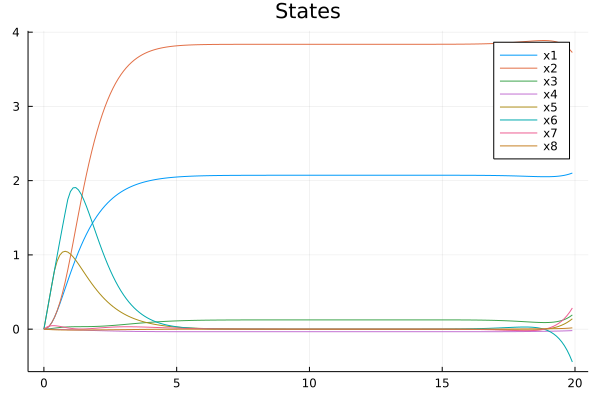

In [23]:
using Plots
tspan = 0 : ∆T : (K-1)*∆T
plot(tspan, x_sol', label=["x1" "x2" "x3" "x4" "x5" "x6" "x7" "x8"], title="States") 

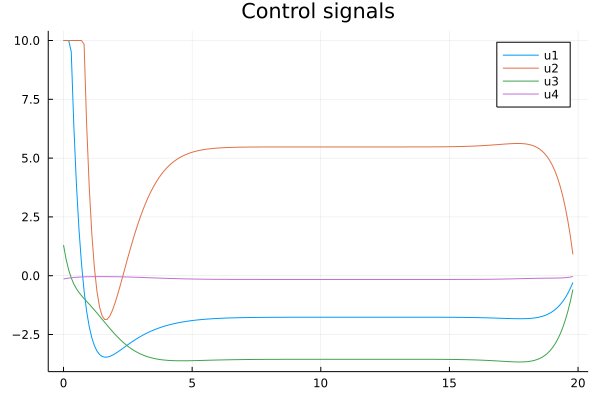

In [24]:
plot(tspan[1:end-1], u_sol', label=["u1" "u2" "u3" "u4"], title="Control signals") 

In [25]:
savefig("Udsol")